In [ ]:
from openai import OpenAI
import os
import json
import base64
from dotenv import load_dotenv
load_dotenv()

# 实例化 OpenAI 客户端
# 建议显式传递 api_key 和 base_url，或者确保它们在环境变量中已设置
client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    base_url=os.getenv("OPENAI_BASE_URL")
)

In [2]:
os.getenv("OPENAI_BASE_URL")

'https://api.bltcy.ai/v1'

ChatCompletion(id='chatcmpl-B20251123213835445261620aYWUurYL', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None))], created=1763905152, model='gemini-3-pro-image-preview', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=1486, prompt_tokens=71, total_tokens=1557, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=None, audio_tokens=0, reasoning_tokens=213, rejected_prediction_tokens=None, text_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0, text_tokens=71, image_tokens=0), input_tokens=0, output_tokens=0, input_tokens_details=None, output_tokens_details=None, claude_cache_creation_5_m_tokens=0, claude_cache_creation_1_h_tokens=0))

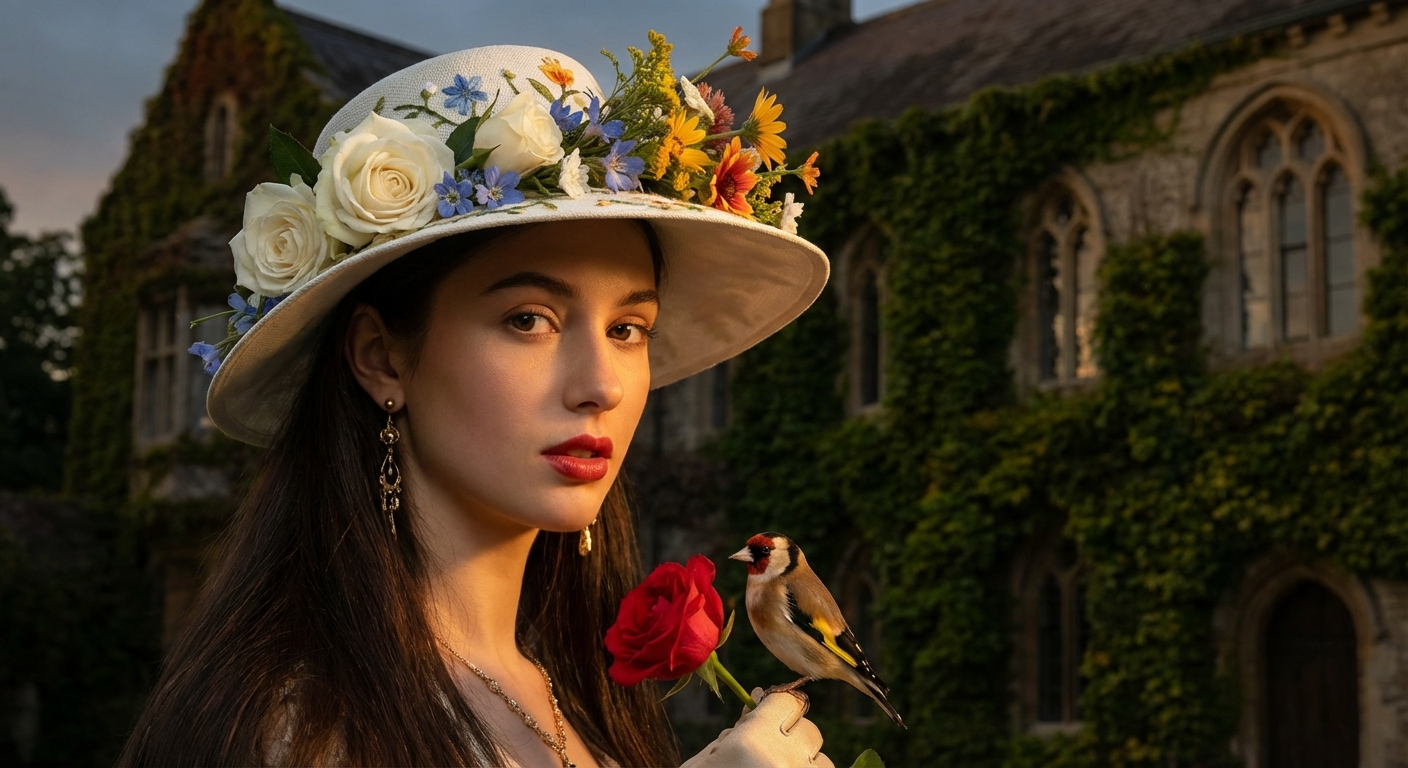

In [3]:
# 发送 Chat Completion 请求
try:
    response = client.chat.completions.create(
        model="gemini-3-pro-image-preview",
        messages=[
            {
                "role": "user", 
                "content": "1girl,Clean face,Long black hair,jewelry,flower,earrings,parted_lips,makeup,rose,bird,white headwear,white_flower,building,portrait,blue flower,yellow flower,hat flower,red lips,orange flower,cinematic lighting,strong contrast,romantic realism style,high level of detail",
            }
        ]
    )
    # 打印完整的响应对象（用于调试）
    print(response)
    
except Exception as e:
    print(f"发生错误: {e}")

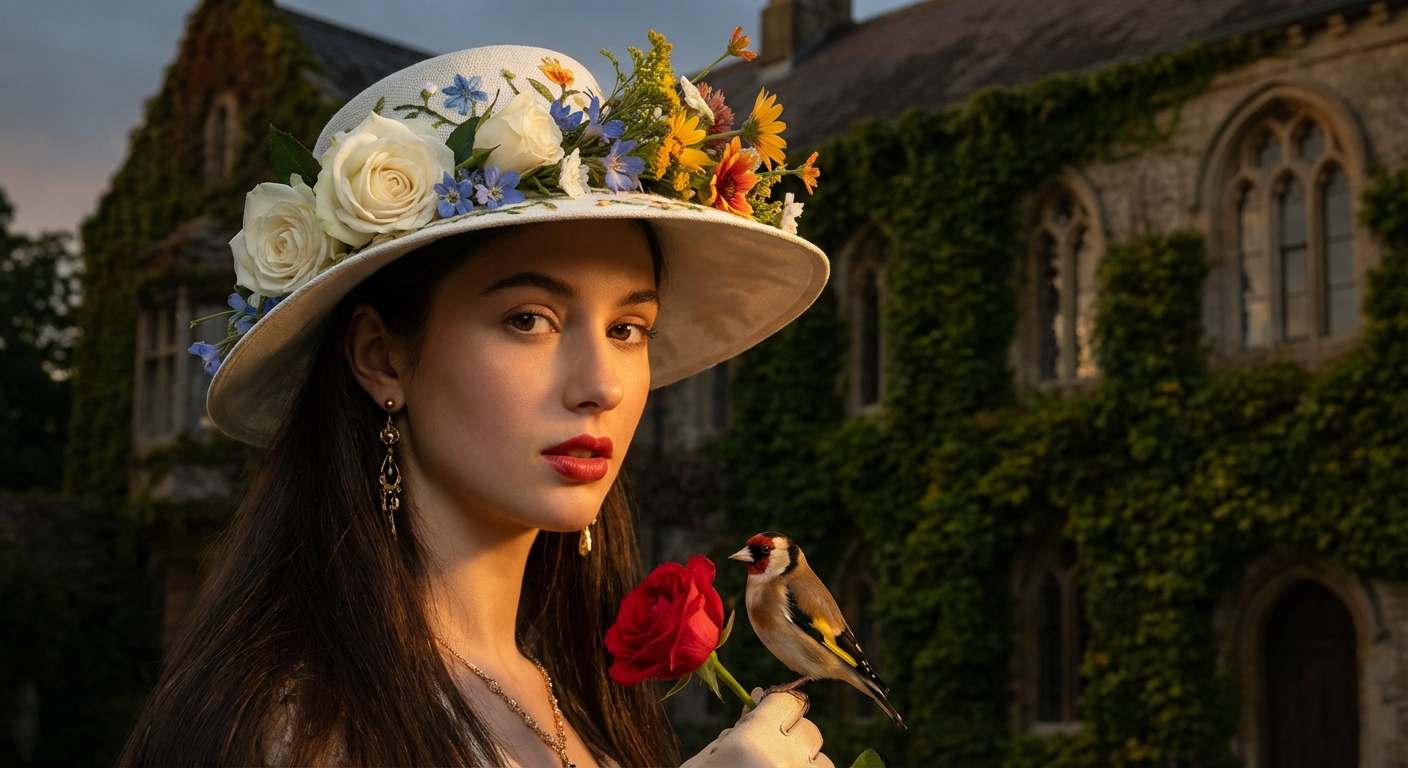

成功解析并显示图片，尺寸: (1408, 768)


In [22]:
import re
import base64
from io import BytesIO
from PIL import Image
from IPython.display import display

# 获取响应内容
content = response.choices[0].message.content

# 正则表达式匹配 Markdown 图片语法 ![alt](data:image/type;base64,content)
# 捕获 base64 字符串部分
pattern = r"!\[.*?\]\(data:image\/.*?;base64,(.*?)\)"
match = re.search(pattern, content, re.DOTALL)

if match:
    base64_data = match.group(1)
    try:
        # 解码 base64 数据
        image_bytes = base64.b64decode(base64_data)
        
        # 转换为图片对象并显示
        image = Image.open(BytesIO(image_bytes))
        display(image)
        print(f"成功解析并显示图片，尺寸: {image.size}")
        
        # 如果需要保存到文件
        # image.save("output_image.png")
        
    except Exception as e:
        print(f"图片转换出错: {e}")
else:
    print("未在内容中找到符合格式的 Base64 图片链接")
    print("原始内容预览:", content[:200])